In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print('numpy:', np.version.version)
print('pandas:', pd.__version__)

numpy: 1.24.3
pandas: 2.0.3


Linear Regression

In [61]:
df = pd.read_csv("https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv")

In [62]:
class LinearRegression:
 
 def fit(self, X, Y):
    X = np.array(X).reshape(-1,1) # convert the argument X into numpy arrays and reshape them into the shape (number of data, number of feature variables)
    Y = np.array(Y).reshape(-1,1)
    x_shape = X.shape
    # self.parameter_cache = []
    num_var = x_shape[1]       #the shape corresponds to number of input variable dimensions. There"s only one for this dataset i.e weight of person
    self.weight_matrix = np.random.normal(-1,1,(num_var,1))
    self.intercept = np.random.rand(1)
    for i in range(50):
        self.dcostdm = np.sum(np.multiply(((np.matmul(X,self.weight_matrix)+self.intercept)-Y),X))*2/x_shape[0] #w.r.t to the weight
        self.dcostdc = np.sum(((np.matmul(X,self.weight_matrix)+self.intercept)-Y))*2/x_shape[0] #partial derivative of cost w.r.t the intercept
        self.weight_matrix -= 0.1*self.dcostdm  #updating the weights with the calculated gradients
        self.intercept -= 0.1*self.dcostdc    #updating the weights with the calculated gradients
#         print(self.weight_matrix)
#         print(self.intercept)
#         print(np.array(self.weight_matrix))
#         print(np.array(self.intercept))
        
#         print(np.array((self.weight_matrix,self.intercept)))
        # self.parameter_cache.append(np.array((self.weight_matrix,self.intercept)))   #the parameters are cached just to track the progress
    return self.weight_matrix,self.intercept #,self.parameter_cache
 
 def predict(self,X):
    product = np.matmul(np.array(X).reshape(-1,1),self.weight_matrix)+self.intercept
    return product

reg = LinearRegression()

In [63]:
#print(df.drop(['Gender'],axis=1))
df.drop(['Gender'],inplace=True,axis=1)
x = (df["Weight"]-df["Weight"].mean())/df["Weight"].std() #standardization of the dataset
y = (df["Height"]-df["Height"].mean())/df["Height"].std() #standardization of the dataset
df.shape

(10000, 2)

In [64]:
params = reg.fit(x[:-180],y[:-180])

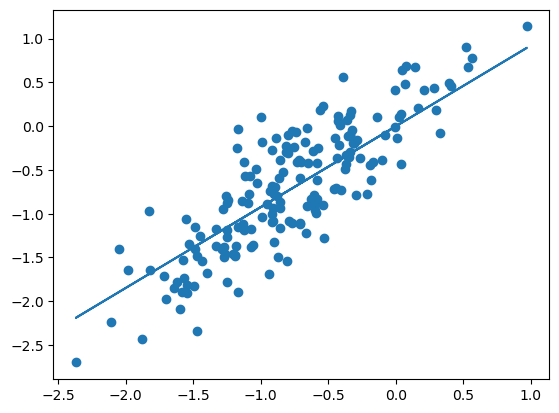

In [65]:
pred = reg.predict(np.array(x[-180:]))
plt.scatter(x[-180:],y[-180:])
plt.plot(x[-180:],pred)

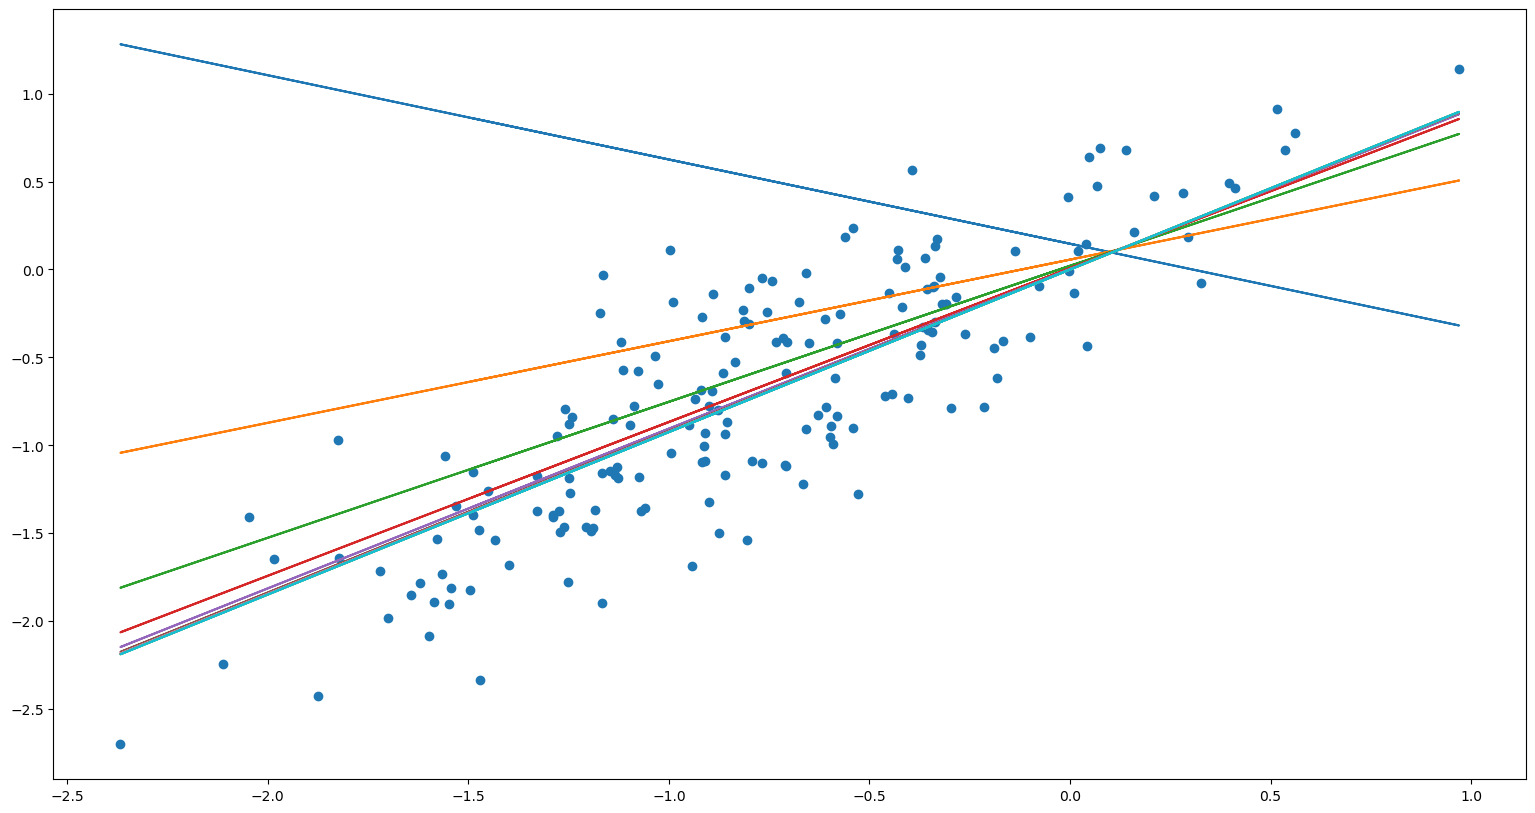

In [38]:
plt.figure(figsize=(19, 10))
plt.scatter(x[-180:],y[-180:])
for i in list(np.arange(0,50,5)):
    value = params[2][i]
    prediction = np.matmul(np.array(x[-180:]).reshape(-1,1),value[0])+value[1]
    plt.plot(x[-180:],prediction)